[How to Train a KAN Model on the Titanic Dataset for Kaggle](https://medium.com/@AI_Whisperer/how-to-train-a-kan-model-on-the-titanic-dataset-for-kaggle-8ff8369e37cf)

In [41]:
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

# Reading the data

In [42]:
## windows
train_data = pd.read_csv(r'C:\Users\phan635\Documents\GitHub\VNN\pykan-pq\learning_code\titanic\train.csv')
test_data = pd.read_csv(r'C:\Users\phan635\Documents\GitHub\VNN\pykan-pq\learning_code\titanic\test.csv')
sub_data = pd.read_csv(r'C:\Users\phan635\Documents\GitHub\VNN\pykan-pq\learning_code\titanic\gender_submission.csv')

## train data

In [43]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [44]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


* 「5   Age」「10  Cabin」include many missing data
* 「11  Embarked」has two missing data

## test data

In [45]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [46]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


## submission data

In [47]:
sub_data.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


# Encoding
---
object -> int

In [48]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in ['Name', 'Sex', 'Ticket']:
    train_data[col] = label_encoder.fit_transform(train_data[col])
    test_data[col] = label_encoder.fit_transform(test_data[col])
train_data.info()
print(train_data[:3])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    int32  
 4   Sex          891 non-null    int32  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    int32  
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int32(3), int64(5), object(2)
memory usage: 73.2+ KB
   PassengerId  Survived  Pclass  Name  Sex   Age  SibSp  Parch  Ticket  \
0            1         0       3   108    1  22.0      1      0     523   
1            2         1       1   190    0  38.0      1      0     596   
2        

# Fillna

In [49]:
import numpy as np
train_data.fillna(train_data.select_dtypes(include=[np.number]).mean(), inplace=True)
test_data.fillna(test_data.select_dtypes(include=[np.number]).mean(), inplace=True)


# Drop columns

In [50]:
train_df = train_data.drop(['PassengerId', 'Survived', 'Age', 'Cabin', 'Embarked'], axis=1)
target_df = train_data['Survived']

## SPLIT

In [51]:
from sklearn.model_selection import train_test_split
print('train_df shape',train_df.shape)
print('target_df',target_df.shape)
# separate the data
X_train, X_test, y_train, y_test = train_test_split(train_df, target_df, test_size=0.2, random_state=42)
print('X_train shape',X_train.shape)
print('X_test shape',X_test.shape)
print('y_train shape',y_train.shape)
print('y_test shape',y_test.shape)

train_df shape (891, 7)
target_df (891,)
X_train shape (712, 7)
X_test shape (179, 7)
y_train shape (712,)
y_test shape (179,)


It is often efficient to normalize your data

In [52]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
'''
X_train_scaled = scaler.fit_transform(X_train)：

对训练数据 X_train 进行标准化处理。首先，fit 方法计算训练数据的均值和标准差，然后 transform 方法根据这些统计量对数据进行转换，使得数据的每个特征具有零均值和单位方差。结果存储在 X_train_scaled 中。
X_test_scaled = scaler.transform(X_test)：

使用在训练数据上计算得到的均值和标准差，对测试数据 X_test 进行标准化处理。这样做是为了保证训练数据和测试数据经过相同的标准化过程。结果存储在 X_test_scaled 中。
'''
print('X_train_scaled',X_train_scaled[:4])

X_train_scaled [[-1.61413602  0.71732642  0.7243102  -0.47072241 -0.47934164 -1.58638267
  -0.07868358]
 [-0.40055118 -1.43097537  0.7243102  -0.47072241 -0.47934164 -0.54683874
  -0.37714494]
 [ 0.81303367  1.39328395  0.7243102  -0.47072241 -0.47934164  1.63720308
  -0.47486697]
 [ 0.81303367 -0.49085053  0.7243102   0.37992316 -0.47934164  0.30278851
  -0.47623026]]


## Convert DF to tensor

In [53]:
import torch
train_input = torch.tensor(X_train_scaled, dtype=torch.float32)
train_label = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)
test_input = torch.tensor(X_test_scaled, dtype=torch.float32)
test_label = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)
print(train_input.shape, train_label.shape, test_input.shape, test_label.shape)

torch.Size([712, 7]) torch.Size([712, 1]) torch.Size([179, 7]) torch.Size([179, 1])


In [54]:
# Check for NaNs
assert not torch.isnan(train_input).any(), "NaNs found in train_input"
assert not torch.isnan(train_label).any(), "NaNs found in train_label"
assert not torch.isnan(test_input).any(), "NaNs found in test_input"
assert not torch.isnan(test_label).any(), "NaNs found in test_label"
assert not torch.isnan(test_input).any(), "NaNs found in test_input"
assert not torch.isnan(test_label).any(), "NaNs found in test_label"
assert not torch.isinf(test_input).any(), "Infs found in test_input"
assert not torch.isinf(test_label).any(), "Infs found in test_label"

## Prepare data for KAN

In [55]:
dataset = {
    'train_input': train_input,
    'train_label': train_label,
    'test_input': train_input,  # Assuming no separate test set for now
    'test_label': train_label
}


# make KAN model

In [56]:
# ! pip install pykan


In [57]:
from kan import KAN, create_dataset

# Initialize KAN model
input_dim = train_input.shape[1]
output_dim = 1
model = KAN(width=[input_dim, 5, output_dim], grid=5, k=3, seed=0)


## Train KAN model

In [58]:
model.train(dataset, opt="LBFGS", steps=20, lamb=0.01, lamb_entropy=10.)


train loss: 3.70e-01 | test loss: 3.70e-01 | reg: 2.42e+01 : 100%|██| 20/20 [00:10<00:00,  1.86it/s]


{'train_loss': [array(0.38436099),
  array(0.37392768),
  array(0.37213151),
  array(0.37005529),
  array(0.37203234),
  array(0.38090256),
  array(0.37237569),
  array(0.37119188),
  array(0.37115674),
  array(0.37131545),
  array(0.36961119),
  array(0.37031015),
  array(0.37029917),
  array(0.37043414),
  array(0.37066553),
  array(0.36966193),
  array(0.36966302),
  array(0.36999225),
  array(0.36998568),
  array(0.37001947)],
 'test_loss': [array(0.38436099),
  array(0.37392768),
  array(0.37213151),
  array(0.37005529),
  array(0.37203234),
  array(0.38090256),
  array(0.37237569),
  array(0.37119188),
  array(0.37115674),
  array(0.37131545),
  array(0.36961119),
  array(0.37031015),
  array(0.37029917),
  array(0.37043414),
  array(0.37066553),
  array(0.36966193),
  array(0.36966302),
  array(0.36999225),
  array(0.36998568),
  array(0.37001947)],
 'reg': [array(40.08859878),
  array(34.84477941),
  array(31.59796721),
  array(29.20418293),
  array(25.97877868),
  array(30.257

## PLOT AND EVALUATE THE MODEL

train loss: 3.70e-01 | test loss: 3.70e-01 | reg: 2.39e+01 : 100%|██| 20/20 [00:11<00:00,  1.77it/s]


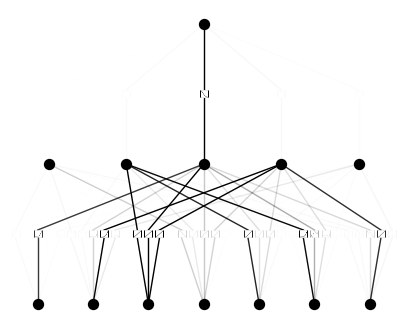

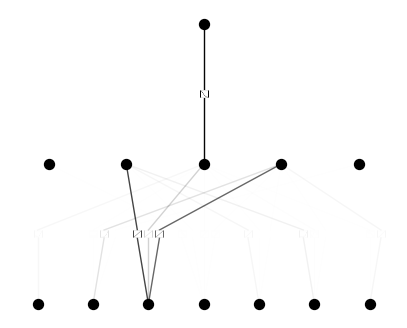

In [59]:
# Plot KAN at initialization
model(dataset['train_input'])
model.plot(beta=100)

# Train the model
model.train(dataset, opt="LBFGS", steps=20, lamb=0.01, lamb_entropy=10.)

# Plot trained KAN
model.plot()

# Prune Redundant Parameters

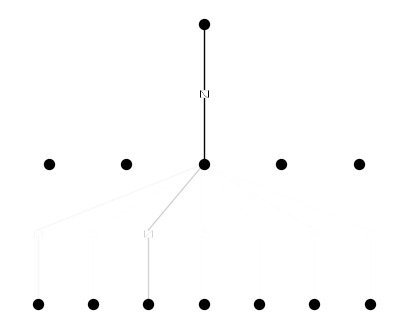

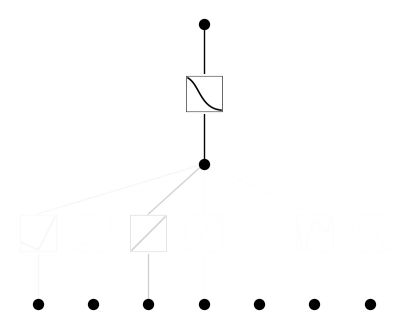

In [60]:
# Prune the model
model.prune()
model.plot(mask=True)
model = model.prune()
model(dataset['train_input'])
model.plot()

# Continue Training and Apply Symbolic Functions

train loss: 3.51e-01 | test loss: 3.51e-01 | reg: 4.77e+00 : 100%|██| 50/50 [00:10<00:00,  4.71it/s]


fixing (0,0,0) with x^4, r2=0.9999999999999868
fixing (0,1,0) with exp, r2=0.8033435869959995
fixing (0,2,0) with exp, r2=1.0000000000000016
fixing (0,3,0) with x^4, r2=0.9996005862041298
fixing (0,4,0) with x^2, r2=0.7378586031470628
fixing (0,5,0) with sin, r2=0.36506800720138377
fixing (0,6,0) with abs, r2=0.6334077606456155
fixing (1,0,0) with tanh, r2=0.958561917918518


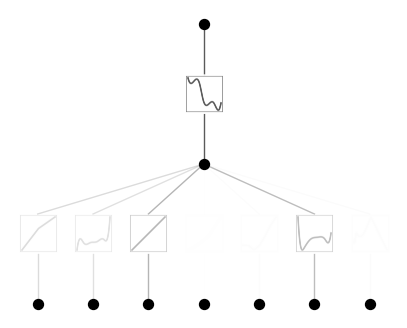

In [61]:
model.train(dataset, opt="LBFGS", steps=50)
model.plot()

mode = "auto"  # "manual"

if mode == "manual":
    model.fix_symbolic(0,0,0,'sin')
    model.fix_symbolic(0,1,0,'x^2')
    model.fix_symbolic(1,0,0,'exp')
elif mode == "auto":
    lib = ['x','x^2','x^3','x^4','exp','log','sqrt','tanh','sin','abs']
    model.auto_symbolic(lib=lib)

## Train to Almost Machine Precision and Obtain the Symbolic Formula

In [62]:
model.train(dataset, opt="LBFGS", steps=50, lr=0.001)
symbolic_formula = model.symbolic_formula()[0][0]
print(symbolic_formula)

train loss: 3.68e-01 | test loss: 3.68e-01 | reg: 4.76e+00 : 100%|██| 50/50 [00:01<00:00, 33.36it/s]


0.57 - 0.44*tanh(-1.48*(1 - 0.19*x_1)**4 + 0.09*(1 - 0.75*x_5)**2 + 0.26*(-0.1*x_4 - 1)**4 + 0.02*exp(7.2*x_3) + 0.39*sin(2.32*x_6 - 5.66) - 0.15*Abs(2.05*x_7 - 8.8) + 1.78)


# Submission

In [63]:
test_df = test_data.drop(['PassengerId', 'Age', 'Cabin', 'Embarked'], axis=1)
test_df_scaled = scaler.transform(test_df)
test_input = torch.tensor(test_df_scaled, dtype=torch.float32)


In [64]:
# Predict with the KAN model

y_pred_sub = model(test_input).detach().numpy()

# Verify lengths
print(f"Length of y_pred_sub: {len(y_pred_sub)}, Length of test_data: {len(test_data)}")


Length of y_pred_sub: 418, Length of test_data: 418


In [65]:
# Set threshold
threshold = 0.5
y_pred_sub = (y_pred_sub >= threshold).astype(int).flatten()  # Ensure the predictions are a flat array
print(y_pred_sub)
# Create submission DataFrame
sub = pd.DataFrame()
sub['PassengerId'] = test_data['PassengerId']
sub['Survived'] = y_pred_sub

print(sub.head())

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 0 1 1 1 0 1 0 0 0]
   PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1


In [66]:
sub.to_csv('submission.csv', index=False)